In [1]:
# load the import libraries
import pandas as pd
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt
import os
import string

In [2]:
# load the data set 
scrap_data_path = "../Scraper/News-Money-control/final-data/"
money_cont_csv = ['business-full-moneycontrol.csv',
              'business-stocks-moneycontrol.csv',
              'company-result-moneycontrol.csv',
              'economy_money_control.csv',
             'guardian_headlines.csv',
              'market-moneycontrol.csv',
              'news-comp-mcont-from-jul-23.csv',
             ]
nifty_label_path = "../Scraper/labels/Nifty/"
nifty_label_files = []

# file_path = os.path.join(folder_path, filename)


# Iterate through all files in the folder
for filename in os.listdir(nifty_label_path):
    if(str(filename).endswith(".csv")):
        print(f'Nifty File: {filename}')
        nifty_label_files.append(filename)       

        
# india vix load
india_vix_path = '../Scraper/labels/vix/'
vix_files = []

print("\n")
for filename in os.listdir(india_vix_path):
    if(str(filename).endswith(".csv")):
        print(f'Vix File: {filename}')
        vix_files.append(filename)  


Nifty File: NIFTY 200_Historical_PR_01012000to07022024.csv
Nifty File: NIFTY 50_Historical_PR_01012000to07022024.csv
Nifty File: NIFTY AUTO_Historical_PR_01012000to07022024.csv
Nifty File: NIFTY CONSUMER DURABLES_Historical_PR_01012000to07022024.csv
Nifty File: NIFTY FMCG_Historical_PR_01012000to07022024.csv
Nifty File: NIFTY HEALTHCARE_Historical_PR_01012000to07022024.csv
Nifty File: NIFTY INDIA MANUFACTURING_Historical_PR_01012000to07022024.csv
Nifty File: NIFTY IT_Historical_PR_01012000to07022024.csv
Nifty File: NIFTY METAL_Historical_PR_01012000to07022024.csv
Nifty File: NIFTY MIDCAP 100_Historical_PR_01012000to07022024.csv
Nifty File: NIFTY OIL & GAS_Historical_PR_01012000to07022024.csv
Nifty File: NIFTY PHARMA_Historical_PR_01012000to07022024.csv
Nifty File: NIFTY SMALLCAP 100_Historical_PR_01012000to07022024.csv


Vix File: hist_india_vix_-08-02-2021-to-08-02-2022.csv
Vix File: hist_india_vix_-08-02-2022-to-08-02-2023.csv
Vix File: hist_india_vix_-08-02-2023-to-08-02-2024.csv
Vi

### combining the data

In [3]:
# combine vix
temp_comb_df = []

for vix_file in vix_files:
    path = os.path.join(india_vix_path,vix_file)
    df = pd.read_csv(path)
    temp_comb_df.append(df)
    
vix_combine_df = pd.concat(temp_comb_df,ignore_index=True)
vix_combine_df

,Date,Open,High,Low,Close,Prev. Close,Change,% Change
0,08-FEB-2021,23.4150,24.3450,22.1775,23.9575,23.4150,0.54,2.32
1,09-FEB-2021,23.9575,24.4675,21.4325,24.2700,23.9575,0.31,1.30
2,10-FEB-2021,24.2700,24.9550,20.9075,23.9525,24.2700,-0.32,-1.31
3,11-FEB-2021,23.9525,24.2225,21.0175,23.0450,23.9525,-0.91,-3.79
4,12-FEB-2021,0.0000,0.0000,0.0000,23.0450,23.9525,-0.91,-3.79
...,...,...,...,...,...,...,...,...
1478,02-FEB-2021,23.3225,23.6100,21.0025,23.3450,23.3225,0.02,0.10
1479,03-FEB-2021,23.3450,24.1975,20.9475,23.7450,23.3450,0.40,1.71
1480,04-FEB-2021,23.7450,23.9325,22.0900,23.1225,23.7450,-0.62,-2.62
1481,05-FEB-2021,23.1225,23.9350,20.0800,23.4150,23.1225,0.29,1.27


In [5]:
# function to remove punctuation
def remove_punctuation(text:str):
    return text.translate(str.maketrans("","",string.punctuation))

def preprocess_df(df,prefix,date_col="date",rename_date=True):
    #create copy
    df = df.copy()
    
    # function to add prefix
    add_prefix = lambda x: prefix+x
    
    # fix the columns name
    df.columns = (
        df.columns
        .str.strip()
        .str.lower()
        .map(remove_punctuation)
        .map(add_prefix)
    )
    
    # convert to pd date
    if(rename_date):
        date_col = prefix+date_col
        df[date_col] = pd.to_datetime(df[date_col])
    
    # sort by date
    df = df.sort_values(by=date_col)
    
    return df

In [6]:
vix_combine_df = preprocess_df(vix_combine_df,prefix='vix_')
vix_combine_df

,vix_date,vix_open,vix_high,vix_low,vix_close,vix_prev close,vix_change,vix_ change
746,2018-02-09,17.7725,20.4225,15.1500,19.2300,17.7725,1.46,8.20
747,2018-02-12,19.2300,19.2300,16.5675,17.8825,19.2300,-1.35,-7.01
748,2018-02-14,17.8825,17.8825,15.5200,17.1850,17.8825,-0.70,-3.90
749,2018-02-15,17.1850,17.1850,14.0850,16.3150,17.1850,-0.87,-5.06
750,2018-02-16,16.3150,16.9725,12.5700,16.3775,16.3150,0.06,0.38
...,...,...,...,...,...,...,...,...
741,2024-02-01,16.0475,16.1075,14.3600,14.4550,16.0475,-1.59,-9.92
742,2024-02-02,14.4550,15.1325,14.0250,14.6975,14.4550,0.24,1.68
743,2024-02-05,14.6975,16.0500,14.6975,15.6175,14.6975,0.92,6.26
744,2024-02-06,15.6175,15.9825,15.0875,15.7850,15.6175,0.17,1.07


In [7]:
df = pd.read_csv(os.path.join(nifty_label_path,nifty_label_files[0]))[['Date','Open','High','Low',"Close"]]
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df

,Open,High,Low,Close
Date,,,,
2024-02-07,12156.20,12162.45,12065.45,12126.80
2024-02-06,12013.65,12090.45,11953.65,12082.95
2024-02-05,12063.50,12091.65,11949.35,11975.65
2024-02-02,12000.60,12140.20,11995.45,12017.20
2024-02-01,11992.75,12003.15,11901.20,11937.65
...,...,...,...,...
2004-01-07,NaN,NaN,NaN,1013.40
2004-01-06,NaN,NaN,NaN,1017.50
2004-01-05,NaN,NaN,NaN,1035.50


In [8]:
nifty_dfs = []

for n_filename in nifty_label_files:
    # make file path
    file_path = os.path.join(nifty_label_path,n_filename)
    
    # create prefix
    prefix = remove_punctuation(n_filename.split("_")[0].lower()).replace(" ","_")
    
    df = pd.read_csv(file_path)
    
    df = df[['Date','Open','High','Low',"Close"]]
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date',inplace=True)
    
    df = preprocess_df(df,prefix+"_",date_col='Date',rename_date=False)
    
    nifty_dfs.append(df)
    
combined_nifty_df = pd.concat(nifty_dfs,axis=1)
combined_nifty_df

,nifty_200_open,nifty_200_high,nifty_200_low,nifty_200_close,nifty_50_open,nifty_50_high,nifty_50_low,nifty_50_close,nifty_auto_open,nifty_auto_high,...,nifty_oil__gas_low,nifty_oil__gas_close,nifty_pharma_open,nifty_pharma_high,nifty_pharma_low,nifty_pharma_close,nifty_smallcap_100_open,nifty_smallcap_100_high,nifty_smallcap_100_low,nifty_smallcap_100_close
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,1482.15,1592.90,1482.15,1592.20,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,1594.40,1641.95,1594.40,1638.70,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,1634.55,1635.50,1555.05,1595.80,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,1595.80,1639.00,1595.80,1617.60,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN,1616.60,1628.25,1597.20,1613.30,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-01,11992.75,12003.15,11901.20,11937.65,21780.65,21832.95,21658.75,21697.45,19351.85,19559.55,...,10654.3,10727.95,18004.6,18053.1,17734.75,17839.20,16119.85,16142.30,15914.50,16127.20
2024-02-02,12000.60,12140.20,11995.45,12017.20,21812.75,22126.80,21805.55,21853.80,19364.00,19563.05,...,10816.65,11111.50,17885.35,18084.7,17884.7,17972.10,16253.20,16388.65,16225.25,16277.85
2024-02-05,12063.50,12091.65,11949.35,11975.65,21921.05,21964.30,21726.95,21771.70,19655.85,19823.35,...,11108.6,11271.40,18034.2,18379.8,17979.55,18292.95,16376.15,16531.75,16220.45,16319.75


In [9]:
combined_nifty_df.describe().T

,count,mean,std,min,25%,50%,75%,max
nifty_200_open,3060.0,5678.976503,2406.601457,2301.10,3986.5375,5370.300,7258.0500,12156.20
nifty_200_high,3060.0,5704.807843,2413.861036,2309.85,4007.7625,5393.075,7349.0375,12162.45
nifty_200_low,3060.0,5642.259118,2393.399734,2260.10,3953.9750,5339.750,7224.4500,12065.45
nifty_200_close,4992.0,4262.459864,2627.742751,740.97,2416.5750,3205.900,5731.1875,12126.80
nifty_50_open,5995.0,6969.319683,5195.536657,853.00,2664.2750,5574.700,10123.0250,22080.50
nifty_50_high,5995.0,7010.923837,5212.045854,877.00,2712.7500,5620.200,10171.3750,22126.80
nifty_50_low,5995.0,6917.921193,5168.826562,849.95,2633.9500,5532.700,10067.4250,21969.80
nifty_50_close,5995.0,6965.518057,5191.360038,854.20,2663.8000,5568.900,10119.5000,22097.45
nifty_auto_open,3060.0,8857.260899,3226.787053,3336.65,6807.2250,8620.300,10889.8500,19977.75
nifty_auto_high,3060.0,8917.658137,3238.455181,3388.05,6915.9250,8668.825,10941.7500,20033.60


In [10]:
combined_nifty_df.columns

Index(['nifty_200_open', 'nifty_200_high', 'nifty_200_low', 'nifty_200_close',
       'nifty_50_open', 'nifty_50_high', 'nifty_50_low', 'nifty_50_close',
       'nifty_auto_open', 'nifty_auto_high', 'nifty_auto_low',
       'nifty_auto_close', 'nifty_consumer_durables_open',
       'nifty_consumer_durables_high', 'nifty_consumer_durables_low',
       'nifty_consumer_durables_close', 'nifty_fmcg_open', 'nifty_fmcg_high',
       'nifty_fmcg_low', 'nifty_fmcg_close', 'nifty_healthcare_open',
       'nifty_healthcare_high', 'nifty_healthcare_low',
       'nifty_healthcare_close', 'nifty_india_manufacturing_open',
       'nifty_india_manufacturing_high', 'nifty_india_manufacturing_low',
       'nifty_india_manufacturing_close', 'nifty_it_open', 'nifty_it_high',
       'nifty_it_low', 'nifty_it_close', 'nifty_metal_open',
       'nifty_metal_high', 'nifty_metal_low', 'nifty_metal_close',
       'nifty_midcap_100_open', 'nifty_midcap_100_high',
       'nifty_midcap_100_low', 'nifty_midcap_100

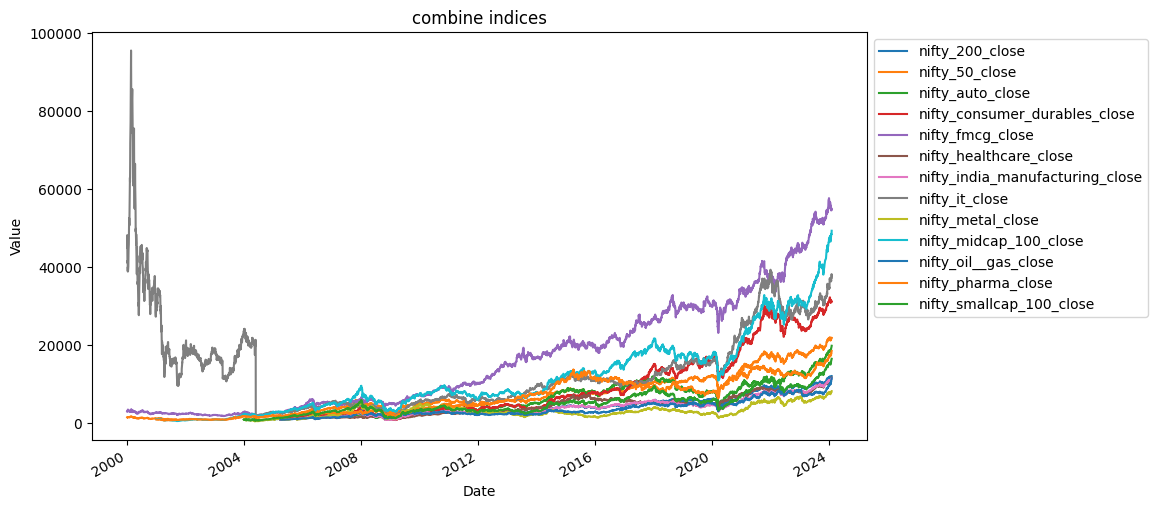

In [11]:
close_columns = ['nifty_200_close', 'nifty_50_close', 'nifty_auto_close',
                 'nifty_consumer_durables_close', 'nifty_fmcg_close',
                 'nifty_healthcare_close', 'nifty_india_manufacturing_close',
                 'nifty_it_close', 'nifty_metal_close', 'nifty_midcap_100_close',
                 'nifty_oil__gas_close', 'nifty_pharma_close',
                 'nifty_smallcap_100_close']

combined_nifty_df[close_columns].plot(figsize=(10,6),title='combine indices')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()